In [2]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm


data = pd.read_csv('ap.csv', float_precision='round_trip')
print(data['timestamp'])
csi_amps = []
for l in data['CSI_DATA']:
    raw_nums = l[1:-2].split(' ')
    nums_array = []
    for s in raw_nums:
        nums_array.append(int(s))
    csi_amp = []
    for i in range(10, 64):
        csi_amp.append(math.sqrt(nums_array[2 * i] ** 2 + nums_array[2 * i + 1] ** 2))
    csi_amps.append(csi_amp)

KeyError: 'timestamp'

In [ ]:
X = np.arange(64 - 10)
Y = np.arange(1000)

Z = np.array(csi_amps[:1000])
print(len(csi_amps))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_zlim(0, 60)
fig.colorbar(surf, shrink=0.5, aspect=5)



In [ ]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

data = pd.read_csv('sta.csv', float_precision='round_trip')
csi_amps = []
print(data['timestamp'])
for l in data['CSI_DATA']:
    raw_nums = l[1:-2].split(' ')
    nums_array = []
    for s in raw_nums:
        nums_array.append(int(s))
    csi_amp = []
    for i in range(10, 64):
        csi_amp.append(math.sqrt(nums_array[2 * i] ** 2 + nums_array[2 * i + 1] ** 2))
    csi_amps.append(csi_amp)

In [ ]:
X = np.arange(64 - 10)
Y = np.arange(100)

Z = np.array(csi_amps[:100])
print(len(csi_amps))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
ax.set_zlim(0, 60)
fig.colorbar(surf, shrink=0.5, aspect=5)

In [ ]:
ax = []
ay = []
with open('sniffer.out', 'rt') as f:
    for l in f:
        l = l.strip()
        a = l.split(',')
        i, rssi = int(a[0]), int(a[1])
        ax.append(i)
        ay.append(rssi)

bx = []
by = []
with open('spammer.out', 'rt') as f:
    for l in f:
        l = l.strip()
        a = l.split(',')
        i, rssi = int(a[0]), int(a[1])
        bx.append(i)
        by.append(rssi)

In [ ]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib import cm

axx = np.array(ax)
ayy = np.array(ay)
bxx = np.array(bx)
byy = np.array(by)

plt.figure()
plt.plot(axx, ayy, 'r--')
plt.plot(bxx, byy, 'b--')

In [ ]:
dict_a = {}
dict_b = {}
for i, v in enumerate(axx):
    dict_a[v] = ayy[i]
    
for i, v in enumerate(bxx):
    dict_b[v] = byy[i]

mu_ayy = np.average(ayy)
mu_byy = np.average(byy)
sig_ayy = math.sqrt(np.var(ayy))
sig_byy  = math.sqrt(np.var(byy))

alpha = 0.2

hi_a = mu_ayy + alpha * sig_ayy
lo_a = mu_ayy - alpha * sig_ayy

hi_b = mu_byy + alpha * sig_byy
lo_b = mu_byy - alpha * sig_byy

ayyy = []
byyy = []
for k in range(256):
    if dict_a.get(k) == None:
        ayyy.append(int(mu_ayy))
    else:
        ayyy.append(dict_a[k])

for k in range(256):
    if dict_b.get(k) == None:
        byyy.append(int(mu_byy))
    else:
        byyy.append(dict_b[k])
        
plt.figure()
plt.plot(ayyy, 'r-')
plt.plot(byyy, 'b-')
plt.plot(np.repeat(hi_a, len(ayyy)), 'r--')
plt.plot(np.repeat(lo_a, len(ayyy)), 'r--')
plt.plot(np.repeat(hi_b, len(byyy)), 'b--')
plt.plot(np.repeat(lo_b, len(byyy)), 'b--')

In [ ]:
quant_a = []
quant_b = []

for i, v in enumerate(ayyy):
    if (v >= hi_a):
        quant_a.append(1)
    elif (v <= lo_a):
        quant_a.append(0)
    else:
        if (byyy[i] >= hi_b):
            quant_a.append(1)
        elif (byyy[i] <= lo_b):
            quant_a.append(0)

for i, v in enumerate(byyy):
    if (v >= hi_b):
        quant_b.append(1)
    elif (v <= lo_b):
        quant_b.append(0)
    else:
        if (ayyy[i] >= hi_a):
            quant_b.append(1)
        elif (ayyy[i] <= lo_a):
            quant_b.append(0)
        
quant_a1 = np.array(quant_a)
quant_b1 = np.array(quant_b)


def diff_key(a, b):
    str1 = ''
    str2 = ''

    red_tmpl = "\x1b[31m{}\x1b[0m"
    green_tmpl = "\x1b[32m{}\x1b[0m"

    for i in range(len(a)):
        if a[i] != b[i]:
            str1 += red_tmpl.format(a[i])
            str2 += red_tmpl.format(b[i])
        else:
            str1 += green_tmpl.format(a[i])
            str2 += green_tmpl.format(b[i])
    return (str1, str2)

def print_key(k):
    green_tmpl = "\x1b[32m{}\x1b[0m"
    kstr = ''
    for i in range(len(k)):
        kstr += green_tmpl.format(k[i])
    return kstr

str1, str2 = diff_key(quant_a1, quant_b1)

print("Alice: {}".format(str1))
print("Bob  : {}".format(str2))

In [ ]:
c = np.random.randint(2, size=len(quant_a1))
s = np.bitwise_xor(quant_a1, c)

cpp = np.bitwise_xor(quant_b1, s)

cp = c
quant_bb = np.bitwise_xor(s, cp)

cpp_str, c_str = diff_key(cpp, c)


# alice = int(quant_a1, 2)
# bob = int(quant_bb, 2)
def bin2hex(key):
    return hex(int(''.join(str(x) for x in key), 2))

alice = bin2hex(quant_a1)
bob = bin2hex(quant_bb)

print("Alice: {}".format(alice[2:]))
print("Bob  : {}".format(bob[2:]))

## CSI

In [24]:
def parse_csi_data(filename):
    csi_data = []
    flag = 0
    with open(filename, 'rt') as f:
        for linenum, line in enumerate(f):
            if linenum == 0:
                continue
            l = line.rstrip().split(',')
            if l[20] == '83':
                flag = 1
                
            if flag == 1 and (int(l[20]) - 83) % 5 == 0 and int(l[20]) < 193:
                csi_data.append(l)
    return csi_data
                
# 0 type
# 1 role
# 2 mac
# 3 rssi
# 4 rate
# 5 sig_mode
# 6 mcs
# 7 bandwidth
# 8 smoothing
# 9 not_sounding
# 10 aggregation
# 11 stbc
# 12 fec_coding
# 13 sgi
# 14 noise_floor
# 15 ampdu_cnt
# 16 channel
# 17 secondary_channel
# 18 local_timestamp
# 19 ant
# 20 sig_len
# 21 rx_state
# 22 real_time_set
# 23 real_timestamp
# 24 len
# 25 CSI_DATA
# 26 timestamp

sta_csi = parse_csi_data('sta1.csv')
ap_csi = parse_csi_data('ap1.csv')

sta = [ele for ele in sta_csi]
ap = [ele for ele in ap_csi]

len_common = min(len(sta), len(ap))

ap = ap[:len_common]
sta = sta[:len_common]


In [31]:
import math

def extract_csi(a):
    result = []
    for e in a:
        csi_raw = e[-1][1:-2]
        csi = csi_raw.split(' ')
        csi_data = []
        for c in csi:
            csi_data.append(int(c))
        result.append(csi_data)
    return result

ap1 = extract_csi(ap)
sta1 = extract_csi(sta)

def to_amp(csi):
    amp = []
    for c in csi:
        csi_data = []
        for i in range(64):
            csi_data.append(math.sqrt(c[2 * i] * c[2 * i] + c[2 * i + 1] * c[2 * i + 1]))
        amp.append(csi_data)
    return amp

ap_amp = to_amp(ap1)
sta_amp = to_amp(sta1)

def avg(x):
    return sum(x) / len(x)
        

def rxy(xs, ys):
    x_avg = avg(xs)
    y_avg = avg(ys)
    
    sxy = 0.0
    for i in range(len(xs)):
        sxy += (xs[i] - x_avg) * (ys[i] - y_avg)
        
    sx_2 = 0.0
    sy_2 = 0.0
    for i in range(len(xs)):
        sx_2 += (xs[i] - x_avg) * (xs[i] - x_avg)
        sy_2 += (ys[i] - y_avg) * (ys[i] - y_avg)
    
    if sx_2 == 0.0 or sy_2 == 0.0:
        return 0.0

    rxy = sxy / (math.sqrt(sx_2) * math.sqrt(sy_2))
    
    return rxy

def reformat_sig(m):
    sig = []

    for i in range(64):
        sig.append([])

    for i in range(len(m)):
        for j in range(64):
            sig[j].append(m[i][j])
    return sig

ap_reformat = reformat_sig(ap_amp)
sta_reformat = reformat_sig(sta_amp)



<IPython.core.display.Javascript object>


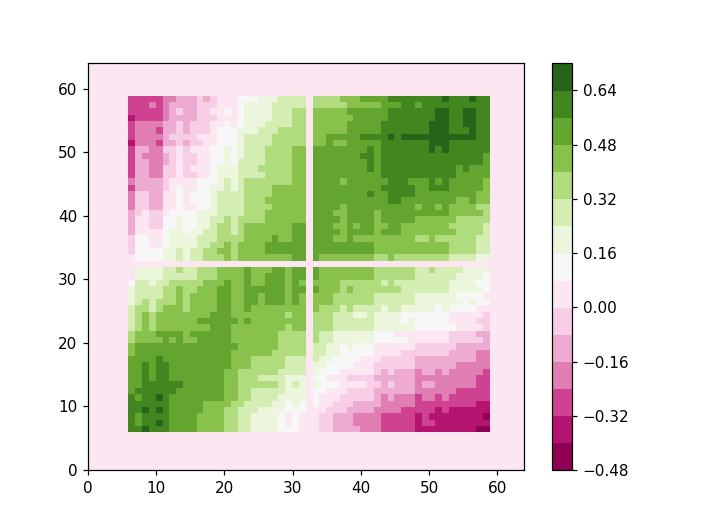

In [41]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


s = (64, 64)
Z = np.zeros(s)

for i in range(64):
    for j in range(64):
        if (i <= 5 or j <= 5):
            Z[i][j] = 0.0
        else:
            Z[i][j] = rxy(ap_reformat[i], sta_reformat[j])

x = np.arange(0, 65)  # len = 11
y = np.arange(0, 65)  # len = 7

fig, ax = plt.subplots()

levels = MaxNLocator(nbins=15).tick_values(Z.min(), Z.max())
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


im = ax.pcolormesh(x, y, Z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax)
